# Importing NLP packages

In [13]:
import nltk

In [5]:
#For using the natural processing in python, we need to download 'stopwords' package from its shell
#for running the shell we will run the code below after importing the module

nltk.download_shell()

In [7]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [8]:
print(len(messages))

5574


In [10]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [12]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

## Creating a dataframe with a delimiter

In [14]:
import pandas as pd

In [20]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','message'])

In [21]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
#now we will group by using the label column
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [25]:
#Creating a field with the length of the sentences
messages['Length'] = messages['message'].apply(len)

In [26]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#We will visualize the information above
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Length', ylabel='Count'>

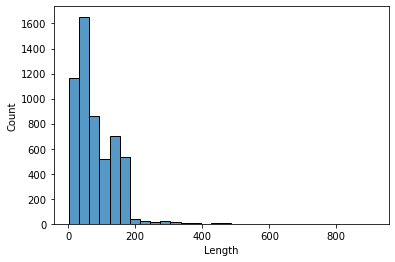

In [30]:
sns.histplot(messages['Length'],bins = 30)

In [31]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [35]:
#exploring the outlier message by length

messages[messages['Length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [33]:
messages.columns

Index(['label', 'message', 'Length'], dtype='object')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

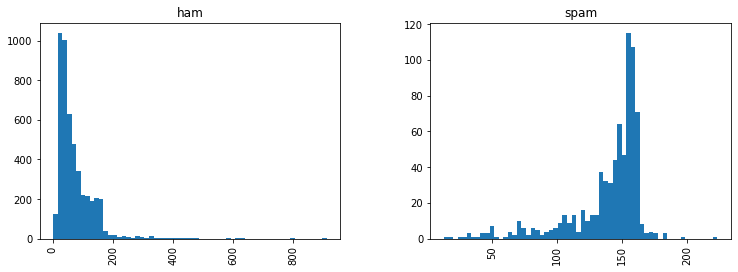

In [37]:
#Creating two visualization of histogram using the pandas build in visualization feature
messages.hist(column = 'Length',by = 'label', bins = 60, figsize = (12,4))

# Part 2 - Text Processing for NLP

Splitting the message into individual words and returning a list

1. Split the messages into words
2. Create a bag of words
3. Remove common words like 'a', 'the' etc

In [38]:
import string

In [39]:
mess = 'Sample Message! Notice: it has punctuation.'

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
nopunc = [c for c in mess if c not in string.punctuation]

In [42]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [43]:
#Now we will look as to how we can remove stopwords
from nltk.corpus import stopwords

In [45]:
stopwords.words('english') #all the stopwords that are there in english will be returned

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
nopunc = ''.join(nopunc) #This is a method of joining elements in a list

In [48]:
nopunc #see all the sentences are together instead of sepearate as a list

'Sample Message Notice it has punctuation'

In [49]:
nopunc.split() #now we are splitting the words into list

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [50]:
#Removing the stopwords from the above list and making a new list
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [51]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

Creating a function that does all the three steps mentioned above

In [58]:
def text_process(mess):
    
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]   
    

In [54]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Cleaning the words from the dataframe

In [59]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
#making bag of words transformer
bow_transformer = CountVectorizer(analyzer =  text_process).fit(messages['message'])

In [62]:
print(len(bow_transformer.vocabulary_))

11425


In [63]:
#checking the fourth message in the column 'message'
mess4 = messages['message'][3]

In [64]:
mess4

'U dun say so early hor... U c already then say...'

In [68]:
#Testing the transform of our CountVectorizer instance on the fourth message
bow4 = bow_transformer.transform([mess4])

In [69]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [70]:
#Determining the words the occur twice in the fourth message

bow_transformer.get_feature_names()[9554]

'say'

# Part 3 - NLP

In [71]:
#Now tranforming the entire column of messages
messages_bow = bow_transformer.transform(messages['message'])

In [72]:
#Now we will see the shape of the sparse matrix

print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [73]:
#To check the non zero occurrences
messages_bow.nnz

50548

# TFIDF

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
#creating an instance
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [77]:
tfidf4 = tfidf_transformer.transform(bow4)

In [79]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [81]:
#Now transforming the entire document
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Now using Naive Bayes to create classification

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [87]:
spam_detect_model.predict(tfidf4)[0]

'ham'

# Splitting the data and creating pipeline

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3,random_state=101)

In [90]:
msg_train

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: message, Length: 3900, dtype: object

# Creating a pipeline of all we did till now

In [91]:
from sklearn.pipeline import Pipeline

In [92]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tdidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])  #We are going to create an instance. The steps are given as tuples

In [93]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000019CDB9EB820>)),
                ('tdidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [94]:
predictions = pipeline.predict(msg_test)